In [999]:
%pip install -U scikit-learn

In [1000]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [1001]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [1002]:
import cv2
import imghdr

In [1003]:
data_dir = 'data'
classes = ['Bulging Eyes', 'Cataracts', 'Crossed Eyes', 'Glaucoma', 'Uveitits']

In [1004]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [1005]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [1006]:
tf.data.Dataset

import numpy as np
from matplotlib import pyplot as plt



In [1007]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 383 files belonging to 5 classes.


In [1008]:
data_iterator = data.as_numpy_iterator()

In [1009]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [1010]:
# images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [1011]:
# Class 1 = Sad 
# Class 0 = happy
batch[1]

array([0, 2, 2, 3, 2, 1, 1, 2, 0, 4, 4, 4, 2, 4, 2, 2, 3, 1, 3, 2, 2, 2,
       1, 1, 3, 1, 1, 0, 0, 2, 2, 2])

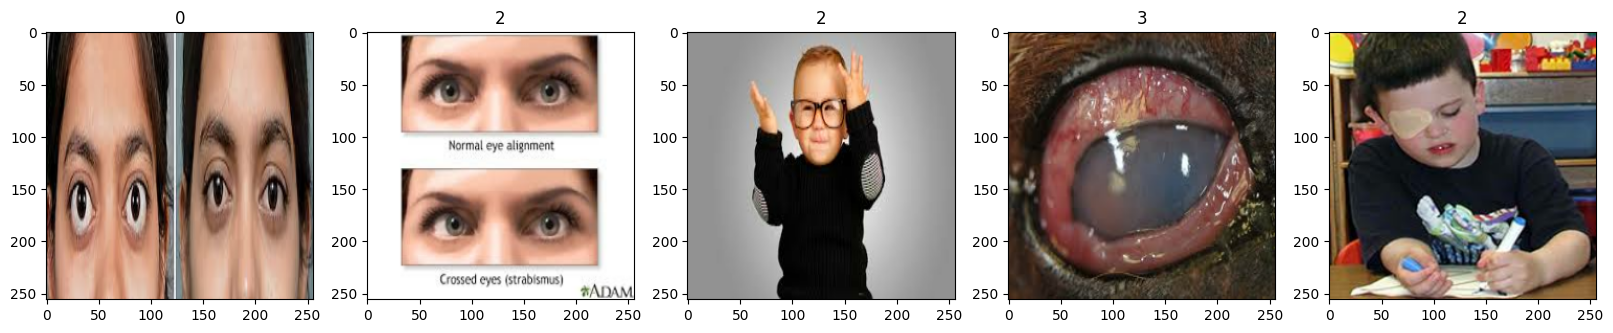

In [1012]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [1013]:
scaled = batch[0] / 255

In [1014]:
data = data.map(lambda x, y: (x / 255, y))

In [1015]:
scaled_iterator = data.as_numpy_iterator()

In [1016]:
batch = scaled_iterator.next()

In [1017]:
batch[0].max()

1.0

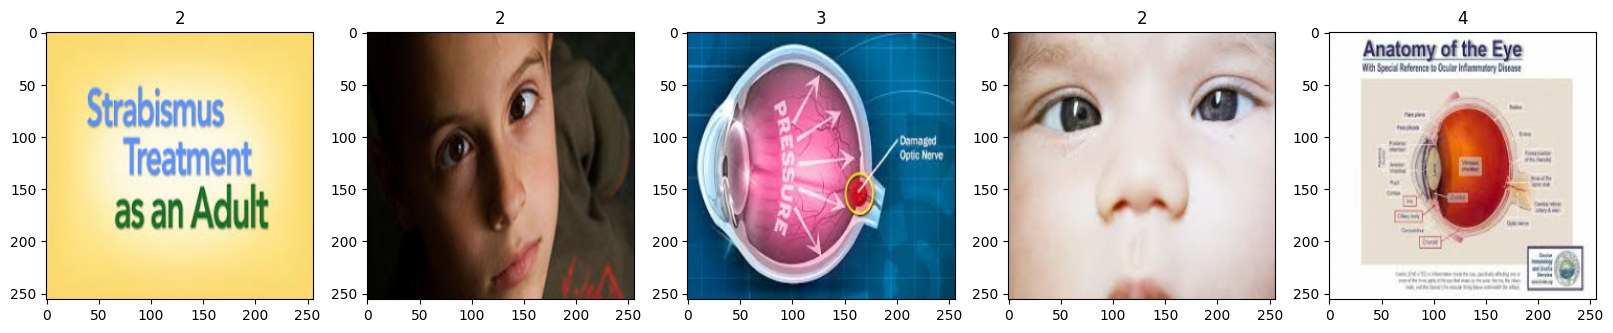

In [1018]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [1019]:
len(data)


12

In [1020]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 1

train_size 

8

In [1021]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [1022]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()


model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))


model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 30, validation_data = val)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_123 (MaxPooli  (None, 64, 64, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 8, 8, 128)         73856     
                                                                 
 conv2d_126 (Conv2D)         (None, 4, 4, 128)       

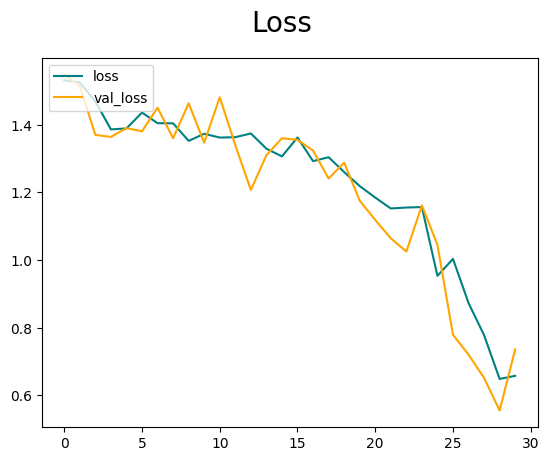

In [1023]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

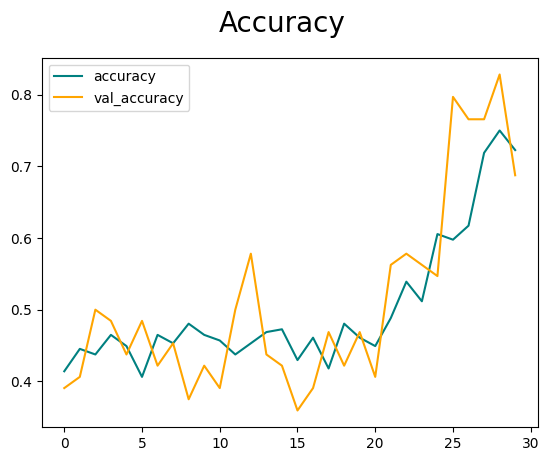

In [1024]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [1025]:
#You can test the NN here by passing in an image
#img = cv2.imread('glaucomatest.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

In [1026]:
#Have to resize the image before we pass it into the NN
#resize = tf.image.resize(img, (256, 256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [1032]:
preds = np.round(model.predict(test), 0)
preds
for i in range(5):
    for j in range(5):
        if preds[i][j] == 1:
            print('This image belongs to: ' + classes[j])
preds

2/2 [==============================] - 0s 82ms/step
This image belongs to: Crossed Eyes
This image belongs to: Crossed Eyes
This image belongs to: Cataracts
This image belongs to: Bulging Eyes
This image belongs to: Glaucoma


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [1028]:

#img_array = tf.keras.utils.img_to_array(resize)
#img_array = tf.expand_dims(resize, 0) # Create a batch

#predictions = model.predict(img_array)
#score = tf.nn.softmax(preds)

#print(
#    "This image most likely belongs to {} with a {:.2f} percent confidence."
#    .format(classes[np.argmax(score)], 100 * np.max(score))
#)